<center>
<img src='https://i.postimg.cc/63rDLhtJ/lang-pic.jpg' width=600>
</center>
    
# 1. Introduction

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">1.1 NLP series</p>

This is the **eighth in a series of notebooks** covering the **fundamentals of Natural Language Processing (NLP)**. I find that the best way to learn is by teaching others, hence why I am sharing my journey learning this field from scratch. I hope these notebooks can be helpful to you too. 

NLP series:

1. [NLP1 - Tokenization](https://www.kaggle.com/samuelcortinhas/nlp1-tokenization)
2. [NLP2 - Pre-processing](https://www.kaggle.com/samuelcortinhas/nlp2-pre-processing) 
3. [NLP3 - Bag-of-Words and Similarity](https://www.kaggle.com/samuelcortinhas/nlp3-bag-of-words-and-similarity)
4. [NLP4 - TF-IDF and Document Search](https://www.kaggle.com/samuelcortinhas/nlp4-tf-idf-and-document-search)
5. [NLP5 - Text Classification with Naive Bayes](https://www.kaggle.com/samuelcortinhas/nlp5-text-classification-with-naive-bayes)
6. [NLP6 - Topic Modelling with LDA](https://www.kaggle.com/samuelcortinhas/nlp6-topic-modelling-with-lda) 
7. [NLP7 - Word Embeddings](https://www.kaggle.com/samuelcortinhas/nlp7-word-embeddings) 
8. [NLP8 - RNNs and Language Models](https://www.kaggle.com/samuelcortinhas/nlp8-rnns-and-language-models) (this one)
9. [NLP9 - Machine Translation and Attention](https://www.kaggle.com/samuelcortinhas/nlp9-machine-translation-and-attention) 
10. [NLP10 - Transformers](https://www.kaggle.com/samuelcortinhas/nlp10-transformers)

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">1.2 Outline</p>

In this notebook, we're going to cover **Recurrent Neural Networks** (RNNs) to model the sequential nature of language. This is the first class of models that we've come across that **takes word order into account**. 

We'll also see how RNNs and it's variants like GRU and LSTM can be used to approach tasks like **Part-of-Speech Tagging**, **Named Entity Recognition** and **Language Modelling**.

# 2. Recurrent Neural Networks

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">2.1 Drawbacks to non-sequential models</p>

In earlier notebooks, we saw how to use **Bag-of-Words** like approaches to vectorize text. This worked well for simple applications but it does have a number of drawbacks. The main ones include:

* There is no way to handle **Out-of-Vocabulary** (OOV) words. If a new word appears in a later document, it will just be dropped. 
* It creates **sparse matrices** which can be inefficient, although we can overcome this by using a dictionary representation. 
* It isn't able to capture similarity between **synonyms**. 
* Word order is lost so words have **no relationship** to each other. For example, "man eats bread" is very different to "bread eats man" but they would have the same representations.

We also came across **static word embeddings**. Whilst this was an improvement to Bag-of-Words because of its ability to capture word meaning, we still had no way to model the sequential nature of language. 

The main challenge with taking word order into account is that sentences can be of **different lengths**. So we need a model that can **automically scale** depending on the sequence length. This is where RNNs come in. 

<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">2.2 Recurrence</p>

<center>
<img src="https://i.postimg.cc/8cdHgR82/RNN.png" width=650>
</center>
<br>

The **recurrence** in an RNN refers to the **repeating** design of the model. An input word vector ($x_t$) is passed through a **fully connected layer** to generate some activations ($a_t$), which can be used to make predictions ($y_t$) at that time step. But these activations are also passed to the next time step acting as a form of **memory**, which are combined to make the next prediction ($y_{t+1}$). This design is repeated at each time step, so there can be any number of units in the sequence. 

There are **3 weights matrices**, which are used repeatedly used in each cell. $W_x$ are the weights for the input, $W_y$ are the weights for the output and $W_h$ are the weights for the memory. They are combined using the following equations:

<br>
$$
\large
h_t = f(W_x x_t + W_h h_{t-1} + b), \qquad y_t = g(W_y a_t + c)
$$
<br>

where $f$ and $g$ are **activation functions** like ReLU or tanh and $b$ and $c$ are the **biases**. Note that it is common to set $h_0$ to be the zero vector. And not every task requires a prediction at each time step ($y_t$), some only require one at the end of each sentence. 

As an example, if we pass the sentence "She has a cat" through an RNN for part-of-speech tagging; at $t_1$ a prediction is made using "She", at $t_2$ "She has" is used, similarly at $t_3$ "She has a" is used and at $t_4$ the whole sentence is used to make a prediction. 

<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">2.3 Training RNNs</p>

<center>
<img src="https://i.postimg.cc/pXcZbYpF/BPTT.png" width=600>
</center>
<br>

Training an RNN is **trickier** than a standard feed-forward neural network because of the time aspect. The algorithm used is called **Backpropagation Through Time** (BPTT). The main idea is that when we compute gradients, we need to **reverse all the arrows** in the computation graph and multiply them using the chain rule. 

For example at the final time step, all the input vectors ($x_t$) and all the hidden states ($h_t$) were used to make this prediction so we have to update all of their corresponding weights. As they share weights matrices, we can add each component together. You can find more details in [this article](https://d2l.ai/chapter_recurrent-neural-networks/bptt.html), but luckily all major deep learning frameworks will **implement this for us**. 

# 3. Language Models

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.1 Word prediction</p>

A **Language model** determines the **probability** of a sequence of words. For example, if you consider the incomplete sentence "I'm going to walk the ...", a reasonable guess for the next word would be "dog" as opposed to "ice-cream" or "mountain". We can see that language is **predictable** and some words are more likely to appear than others. 

Mathematically, we can use the **multiplication rule** to represent the probability of a sequence as a product of conditional probabilities:

<br>
$$
\large
\begin{align*}
\mathbb{P}(w_1,...,w_n) &= \prod_{i=1}^{n} \mathbb{P} (w_i | w_1,...,w_{i-1}) \\
& = \mathbb{P}(w_1) \mathbb{P}(w_2|w_1) ... \mathbb{P}(w_n|w_1,...,w_{n-1})
\end{align*}
$$
<br>

This is a **difficult task** because it is impossible to get a training corpus with every combination of words in a sequence. We will see that we can use an RNN to **train** a language model by using a clever trick. 

<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.2 Training an RNN for language modelling</p>

To train an RNN for language modelling, we start by **segmenting** a corpus into chunks, sentences or paragraphs to feed into the model. The longer the sequence length the more **computationally expensive** it is to train but the better the model is at capturing **long range dependencies**. 

We then use a **self-supervised** learning approach. At every time step, we get the RNN to try to **predict the next word** in the sentence in the training corpus. What is great is that we don't need to label the data, as we use the words as the labels themselves. 

The outputs $y_t$ are **probability distributions** over the whole vocabulary. They assign a probability to each word, which represents how likely that word is to appear next given the previous words. A **cross-entropy loss** can be used to measure how good each prediction is. 

<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.3 Text generation</p>

To **generate new text** after training, we modify the RNN to **sample** the output probability distribution at each time step and feed this to be **input** word for following time step, that is $x_{t+1} \sim y_{t}$. 

<br>
<center>
<img src="https://i.postimg.cc/0N0kKYXy/RNN-for-LM.jpg" width=600>
</center>
<br>

So given an input word (this can fixed or randomly sampled), we can generated any amount of text we like. It won't be perfect or grammatically correct by default but it will produce text that has a **similar distribution** to the one it was trained on.

For example, if we use a training corpus comprising of the Lord of the Rings books, then the generated text will look somewhat similar to languge in these books. 

<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">3.4 Evaluating language models</p>

If we **measure** the output **probabilities** of a language model on a **test set**, we expect better models to produce **higher** probabilities for the correct words. 

A common **metric** to evaluate language models is called **Perplexity** and is defined as:

<br>
$$
\large
\text{Perplexity} = \left(\prod_{i=1}^{T} \mathbb{P}_{LM}(w_i|w_1,...,w_{i-1})\right)^{-1/T} = \sqrt[T]{\prod_{i=1}^{T} \frac{1}{\mathbb{P}_{LM}(w_i|w_1,...,w_{i-1})}}
$$
<br>

Because of the inverse probabilities, the **lower** the perplexity score the **better** and the more natural the language produced. The T-th root is there to **control** for different test lengths.

Note that **humans** have a certain perplexity score too, depending on the corpus, so getting a model's perplexity score too low below that **benchmark** may also produce unnatural text.

# 4. RNN variants

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">4.1 Drawbracks of simple RNNs</p>

We've now seen the architecture of a **standard** recurrent neural network. Whilst they are big **improvement** in terms of dealing with word order, they do have some shortcomings in their current state. These include:

* Struggling to capture **long range dependencies** because the signal gets **weakens** over time. Simple RNNs have no way of deciding what information is important to 'remember' and what can be 'forgetten'.
* **Vanishing and/or exploding gradients** can occur during training because of the many components affecting each matrix of weights.

There are some ways to **dampen** the affects of these problems, like **gradient clipping**, **batch normalization**, **weight initialization** etc. However, better **cell architectures** have been found, which avoid these problems and produce better results. These include **GRU** and **LSTM**, which we will discuss now. 

<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">4.2 GRU</p>

<center>
<img src="https://i.postimg.cc/RV921t3J/gru-cell.png" width=600>
</center>
<br>

GRU stands for **Gated Recurrent Unit** and is a variant of a RNN where the cell/unit has the ability to **forget** information it deems irrelevant. As a result, it tends to do a better job at capturing **long range dependencies** at the cost of increasing the number of **parameters** in the model. 

<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">4.3 LSTM</p>

<center>
<img src="https://i.postimg.cc/d1rSrQw9/lstm-cell.jpg" width=500>
</center>
<br>

LSTM stands for **Long Short Term Memory** and is similar to GRU but has more parameters and can manage more complex information transfer. In addition to the normal hidden state that gets passed between units, LSTM has an additional **cell state** that captures **long term memory**. The affect is that the model can make predictions using both short term and long term memory. 

LSTM is more complicated than GRU, so it is able to reach **better performance** on some tasks but again at the cost of increasing the number of **parameters** in the model and therefore taking **longer to train**. 

<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">4.4 Deep RNNs</p>

<center>
<img src="https://i.postimg.cc/C5LhQQv9/deep-rnn.png" width=250>
</center>
<br>

There are several ways to **combine** recurrent neural networks. One way is to **stack** multiple RNNs on top of each other. We can do this since each RNN takes in a sequence and outputs another sequence of the same length. 

Just like adding another **layer** in a feed-forward neural network, stacking RNNs allows the model to learn more useful **representations** of the data. This can be useful for very **complex** tasks that consist a large number **interactions** in the data, for example machine translation. Again, the thing to keep in mind is that this takes much **longer** to train the model. 

<br>

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">4.5 Bidirectional RNNs</p>

There are some tasks where it makes sense to use not only previous words in the sentence but also **future words** in the sentence. For example, the word "India" in the two sentences "India has a population of 1.4 billion people" and "India got her bag ready to go to school" has **different meaning** based on the words that come **after** it. 

<br>
<center>
<img src="https://i.postimg.cc/XNCkNNg2/bidirectional-rnns.png" width=500>
</center>
<br>

**Bidirectional RNNs** work by adding a **second** RNN that processes the text in **reverse order**. This ensures that the model uses the **whole sentence** each time it makes a prediction. 

Note that the cells in this model can be either **simple RNN, GRU or LSTM units** depending on your preference. It is even possible to **stack** bidirectional RNNs to create **deep bidirectional RNNs**.

# 5. Application

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">5.1 Part-of-Speech Tagging</p>

We're going to build a **bidirectional LSTM** to perform **Part-of-Speech (PoS) tagging**. We'll use datasets from nltk to train our model

<br>

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import requests
import nltk
from nltk.corpus import treebank, brown, conll2000
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

**Load data**

<br>

We'll use 3 PoS datasets together. Because they all have different tagging schemes, we also download the **universal tagging schema** to ensure they are all tagged **consistently**. Note that this **simplifies** some of the tags, for example example proper noun is converted to noun. 

In [2]:
# PoS datasets
nltk.download('treebank')
nltk.download('brown')
nltk.download('conll2000')

# Use universal tagging system
nltk.download('universal_tagset')

[nltk_data] Downloading package treebank to /usr/share/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package brown to /usr/share/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package conll2000 to /usr/share/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [3]:
# Retrieve all PoS-tagged sentences and join them in one list
tagged_sentences = treebank.tagged_sents(tagset='universal') + brown.tagged_sents(tagset='universal') + conll2000.tagged_sents(tagset='universal')

# Example
print("Dataset size:", len(tagged_sentences))
print(tagged_sentences[0])

Dataset size: 72202
[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')]


**Separate features and labels**

In [4]:
# Initalize
X, y = [], []

# Split sentences into words and tags
for s in tagged_sentences:
    sentence, tags = zip(*s)
    X.append(list(sentence))
    y.append(list(tags))
    
# Example
print(X[0])
print(y[0])

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
['NOUN', 'NOUN', '.', 'NUM', 'NOUN', 'ADJ', '.', 'VERB', 'VERB', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'NOUN', 'NUM', '.']


**Train-valid-test split**

In [5]:
# Create train, validation and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_tr, y_tr, test_size=0.25, shuffle=True, random_state=0) # 0.25 * 0.8 = 0.2

# Print shapes
print("Train size:", len(X_train))
print("Valid size:", len(X_valid))
print("Test size:", len(X_test))

Train size: 43320
Valid size: 14441
Test size: 14441


**Tokenizers**

We need to tokenize both the features and the labels using **two different tokenizers** as they are both sequences.

In [6]:
# Define tokenizers
word_tokenizer = keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
tag_tokenizer = keras.preprocessing.text.Tokenizer()

# Fit tokenizers
word_tokenizer.fit_on_texts(X_train)
tag_tokenizer.fit_on_texts(y_train)

# Print vocabulary sizes
print("Word vocabulary size:", len(word_tokenizer.word_index))
print("Tag vocabulary size:", len(tag_tokenizer.word_index))

# Print set of tags
print("\nPossible tags:", tag_tokenizer.word_index)

Word vocabulary size: 46881
Tag vocabulary size: 12

Possible tags: {'noun': 1, 'verb': 2, '.': 3, 'adp': 4, 'det': 5, 'adj': 6, 'adv': 7, 'pron': 8, 'conj': 9, 'prt': 10, 'num': 11, 'x': 12}


In [7]:
# Map tokens to integer ids
X_train_ids = word_tokenizer.texts_to_sequences(X_train)
X_valid_ids = word_tokenizer.texts_to_sequences(X_valid)
X_test_ids = word_tokenizer.texts_to_sequences(X_test)

y_train_ids = tag_tokenizer.texts_to_sequences(y_train)
y_valid_ids = tag_tokenizer.texts_to_sequences(y_valid)
y_test_ids = tag_tokenizer.texts_to_sequences(y_test)

**Padding**

<br>

Padding is a way of making all input sequences the **same length**, by filling shorter sequences with 0's and truncating longer sequences. Although is isn't necessarily required for RNNs, it usually **speeds up training** because it is easier to **batch** training examples together. 

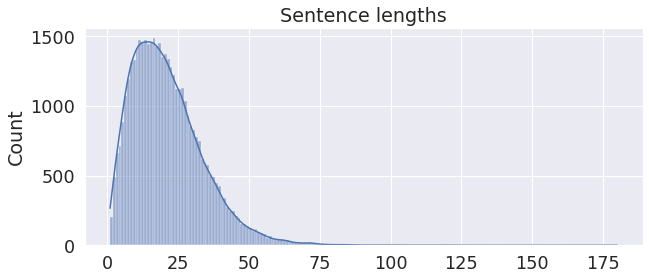

In [8]:
plt.figure(figsize=(10,4))
sns.histplot([len(X_train_ids[i]) for i in range(len(X_train_ids))], binwidth=1, kde=True)
plt.title('Sentence lengths')
plt.show()

Since most sentences have less than 75 words, we'll **truncate** longer sentences to only include the first 75 words. A more sophisticated approach would be to truncate on a batch-by-batch basis to reduce the number of unnecessary 0's but this will still work well.

In [9]:
# Maximum length of sequences
max_length = 75

# Pad sequences
X_train_pad = keras.preprocessing.sequence.pad_sequences(X_train_ids, padding='post', maxlen=max_length)
X_valid_pad = keras.preprocessing.sequence.pad_sequences(X_valid_ids, padding='post', maxlen=max_length)
X_test_pad = keras.preprocessing.sequence.pad_sequences(X_test_ids, padding='post', maxlen=max_length)

y_train_pad = keras.preprocessing.sequence.pad_sequences(y_train_ids, padding='post', maxlen=max_length)
y_valid_pad = keras.preprocessing.sequence.pad_sequences(y_valid_ids, padding='post', maxlen=max_length)
y_test_pad = keras.preprocessing.sequence.pad_sequences(y_test_ids, padding='post', maxlen=max_length)

# Example
print(X_train_pad[0])

[  10 6746   18 5574  491   25 1237  582    5 5575  393    2  101  375
   27  441 5931  582    3 5574   14 9422  393    8  101  319    4    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]


**Build model**

<br>

Our model will consist of an **embedding layer** followed by a **bidirectional LSTM**. 

Note that `mask_zero = True` tells the embedding layer to **ignore padding values** so the model won't make predictions at these time steps. This will make it easier to **properly evaluate** our model as we only care about its performance on non-padded values.

Furthermore, since this is a sequence labelling task we want our model to make a **prediction at each time step**. Setting `return_sequences = True` accomplishes that. 

In [10]:
# Input/output size (+ 1 for padding token)
num_tokens = len(word_tokenizer.word_index) + 1
num_classes = len(tag_tokenizer.word_index) + 1

# Embedding dimension
embedding_dim = 128

In [11]:
# Build model
model = keras.Sequential([

    # Map integer ids to trainable word vectors
    layers.Embedding(input_dim = num_tokens, 
                           output_dim = embedding_dim, 
                           input_length = max_length,
                           mask_zero = True),
    
    # Bidirectional LSTM
    layers.Bidirectional(layers.LSTM(128, return_sequences = True, 
                           kernel_initializer = tf.keras.initializers.random_normal(seed=0))),
    
    # Output layer
    layers.Dense(num_classes, activation='softmax', 
                           kernel_initializer=tf.keras.initializers.random_normal(seed=0))
])

# Define optimizer, loss function and accuracy metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Model summary
model.summary()

2023-02-20 21:44:14.878145: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 21:44:14.997184: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 21:44:14.998463: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-20 21:44:15.002001: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 75, 128)           6000896   
_________________________________________________________________
bidirectional (Bidirectional (None, 75, 256)           263168    
_________________________________________________________________
dense (Dense)                (None, 75, 13)            3341      
Total params: 6,267,405
Trainable params: 6,267,405
Non-trainable params: 0
_________________________________________________________________


**Train model**

<br>

We'll use **early stopping** to prevent overfitting to the train set.

In [12]:
# Early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)

# Train model
history = model.fit(
    X_train_pad, y_train_pad,
    validation_data = (X_valid_pad, y_valid_pad),
    epochs = 20,
    batch_size = 128,
    callbacks = [early_stopping],
    verbose = True
)

Epoch 1/20


2023-02-20 21:44:19.737669: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-02-20 21:44:26.926783: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


339/339 [==============================] - 18s 28ms/step - loss: 0.1973 - sparse_categorical_accuracy: 0.7855 - val_loss: 0.0382 - val_sparse_categorical_accuracy: 0.9555
Epoch 2/20
339/339 [==============================] - 7s 21ms/step - loss: 0.0272 - sparse_categorical_accuracy: 0.9682 - val_loss: 0.0291 - val_sparse_categorical_accuracy: 0.9648
Epoch 3/20
339/339 [==============================] - 7s 22ms/step - loss: 0.0181 - sparse_categorical_accuracy: 0.9785 - val_loss: 0.0273 - val_sparse_categorical_accuracy: 0.9679
Epoch 4/20
339/339 [==============================] - 8s 23ms/step - loss: 0.0139 - sparse_categorical_accuracy: 0.9837 - val_loss: 0.0275 - val_sparse_categorical_accuracy: 0.9682
Epoch 5/20
339/339 [==============================] - 7s 21ms/step - loss: 0.0111 - sparse_categorical_accuracy: 0.9874 - val_loss: 0.0286 - val_sparse_categorical_accuracy: 0.9678
Epoch 6/20
339/339 [==============================] - 7s 22ms/step - loss: 0.0088 - sparse_categorical_ac

The model reaches a reasonably **high accuracy** very **quickly**. After only a few epochs, early stopping kicks in.

**Evaluate on test set**

In [13]:
# Evaluate model
model.evaluate(X_test_pad, y_test_pad)

452/452 [==============================] - 3s 6ms/step - loss: 0.0330 - sparse_categorical_accuracy: 0.9672


[0.03304804116487503, 0.9672076106071472]

**Tag new samples**

<br>

The following function takes a list of sentences as input and returns the models **predicted tags** for each word.

In [14]:
# Tag new sentences
def tag_new_sentences(sentences):
    # Tokenize new sentences
    X_new_ids = word_tokenizer.texts_to_sequences(sentences)
    
    # Pad sequences
    X_new_pad = keras.preprocessing.sequence.pad_sequences(X_new_ids, padding = 'post', maxlen = max_length)
    
    # Make predictions
    X_new_preds = model.predict(X_new_pad)
    
    # Retrieve most likely tag for each word
    sentence_tags = []
    for i, preds in enumerate(X_new_preds):
        # Extract tags for only non-padded tokens
        tags_seq = [np.argmax(p) for p in preds[:len(X_new_ids[i])]]
        
        # Convert ids back to tokens
        words = [word_tokenizer.index_word[w] for w in X_new_ids[i]]
        tags = [tag_tokenizer.index_word[t] for t in tags_seq]
        
        # zip words and tags together
        sentence_tags.append(list(zip(words, tags)))

    return sentence_tags

In [15]:
# Example sentences
ex = [
    "Newly discovered green comet comes close to Earth.",
    "Nasa's Mars rover Perseverance completes rock depot.",
]

# Tag sentences
ex_tagged = tag_new_sentences(ex)

# Print results
print(ex_tagged[0])
print('\n',ex_tagged[1])

[('newly', 'adv'), ('discovered', 'verb'), ('green', 'adj'), ('comet', 'noun'), ('comes', 'verb'), ('close', 'adv'), ('to', 'adp'), ('earth', 'noun')]

 [('<OOV>', 'adj'), ('mars', 'noun'), ('rover', 'noun'), ('perseverance', 'noun'), ('completes', 'verb'), ('rock', 'noun'), ('depot', 'noun')]


Nowadays, state-of-the-art PoS taggers use **transformer** models and much **more data** but it's still impressive that we very good results using a recurrent neural network.

## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 1px; color:#207d06; font-size:100%; text-align:left;padding: 0px; border-bottom: 3px solid #207d06;">5.2 Language Modelling</p>

We're now going to build a language model to **generate text like William Shakespear**. To train this model, we'll use a **text file** that contains the scripts for all of Shakespear's plays. 

In [16]:
# Load text file
text = open('/kaggle/input/shakespeare-text/text.txt', 'r').read()

# Preview text
print(text[:300])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us


We're actually going to build a **character level** model because this will be **easier to train** since the target space is significantly smaller compared to a word prediction model.

A downside to predicting characters is the additional challenge of **learning to spell** words correctly. It does make it easier to deal with out of vocabulary words though so there is a trade-off.

**Tokenizer**

<br>

Notice how some **special characters** get included in the vocabulary but all letters has been **lower cased**.

In [17]:
# Tokenize individual letters
tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)

# Fit tokenizer
tokenizer.fit_on_texts([text])

# Print vocabulary size
print("Vocabulary size:", len(tokenizer.word_index))

# Print vocabulary
print("\nVocabulary:", tokenizer.word_index)

Vocabulary size: 39

Vocabulary: {' ': 1, 'e': 2, 't': 3, 'o': 4, 'a': 5, 'i': 6, 'h': 7, 's': 8, 'r': 9, 'n': 10, '\n': 11, 'l': 12, 'd': 13, 'u': 14, 'm': 15, 'y': 16, 'w': 17, ',': 18, 'c': 19, 'f': 20, 'g': 21, 'b': 22, 'p': 23, ':': 24, 'k': 25, 'v': 26, '.': 27, "'": 28, ';': 29, '?': 30, '!': 31, '-': 32, 'j': 33, 'q': 34, 'x': 35, 'z': 36, '3': 37, '&': 38, '$': 39}


In [18]:
# Vectorize characters to intger ids
ids = tokenizer.texts_to_sequences([text])[0]

# Print length of sequence
print("Number of tokens:", len(ids))

Number of tokens: 1115393


**Chunking**

<br>

We now need to **segment** the sequence of ids into **chunks** that will be our training examples. We do this by converting into a **tensorflow dataset** object and applying a **windowing function**. 

We need to **add 1** to the input sequence length because we are going to use the **next character** as the label for the current character. This will ensure we have the same input and target sequence lenghts. The `shift` parameter determines how many characters we shift to the right before creating a new chunk, i.e. it controls how much the chunks **overlap** (if at all). 

In [19]:
# Tensorflow dataset
slices = tf.data.Dataset.from_tensor_slices(ids)

# Create chunks
input_timesteps = 100
window_size = input_timesteps + 1
windows = slices.window(window_size, shift=50, drop_remainder=True)  # bigger shift reduces number of chunks

# Convert window objects to tensors
dataset = windows.flat_map(lambda window: window.batch(window_size))

# Divide dataset into batches for training
batch_size = 32
batches = dataset.shuffle(10000).batch(batch_size)

# Print example batches
for b in batches.take(2):
    print(b)

tf.Tensor(
[[19  7  5 ... 17  1  4]
 [13 27 11 ...  1 21  5]
 [ 8  3  9 ...  1 15  2]
 ...
 [ 5  6 10 ...  1 28  5]
 [10  4 17 ... 15 16  1]
 [18  1  6 ... 33  4  6]], shape=(32, 101), dtype=int32)
tf.Tensor(
[[ 3  4  9 ... 20  1 16]
 [ 1  5 20 ... 33  4  7]
 [13  6 13 ... 15  2 24]
 ...
 [11  5  1 ... 16  4 14]
 [30 11  7 ... 24 11 19]
 [14 10 19 ... 13  1 10]], shape=(32, 101), dtype=int32)


**Features and labels**

<br>

Now that we have our chunks, we need to **split** them into training features and labels. Remember that we are using a **self-supervised** approach, so the label is always the character that comes after the current one. We are trying to teach our model to predict the **next character** in the sequence.

In [20]:
# Split features and labels
Xy_batches = batches.map(lambda batch: (batch[:, :-1], batch[:, 1:]))

# Print first training example
for b in Xy_batches.take(1):
    print("X1 length: ", len(b[0][0].numpy()))
    print("X1: ", b[0][0].numpy())
    print("\ny1 length: ", len(b[1][0].numpy()))
    print("y1: ", b[1][0].numpy())

X1 length:  100
X1:  [ 5 14 10  3 24 11  4 18  1  3  4  1 17  7  5  3  1 23 14  9 23  4  8  2
  1 13  4  8  3  1  3  7  4 14  1  7  4  5  9 13  1  3  7 16  1 17  4  9
 13  8 18 11  3  7  5  3  1  3  7  4 14  1  9  2  3 14  9 10 28  8  3  1
 10  4  1 21  9  2  2  3  6 10 21  1  3  4  1  3  7 16  1 20  9  6  2 10
 13  8 30 11]

y1 length:  100
y1:  [14 10  3 24 11  4 18  1  3  4  1 17  7  5  3  1 23 14  9 23  4  8  2  1
 13  4  8  3  1  3  7  4 14  1  7  4  5  9 13  1  3  7 16  1 17  4  9 13
  8 18 11  3  7  5  3  1  3  7  4 14  1  9  2  3 14  9 10 28  8  3  1 10
  4  1 21  9  2  2  3  6 10 21  1  3  4  1  3  7 16  1 20  9  6  2 10 13
  8 30 11 11]


**Vectorize inputs**

<br>

The last step is map our input integer ids to **vectors**. Since each token is just a character, it doesn't make much sense to use embeddings as there is no sense of character meaning. Instead, we'll just use **one-hot encoding** to be able to pass it to a RNN model. 

In [21]:
# Number of tokens (+1 of oov tokens)
num_tokens = len(tokenizer.word_index) + 1

# One-hot encode the input sequences
Xy_batches = Xy_batches.map(lambda inputs, labels: (tf.one_hot(tf.cast(inputs, tf.int32), depth=num_tokens), labels))

Prefetching **loads** the data for the **next batch**, while the model is training on the current batch. It can **speed** up the training process.

In [22]:
# Prefetch data
Xy_batches = Xy_batches.prefetch(tf.data.AUTOTUNE)

**Build model**

<br>

We're now ready to build our model. This time there will be **no imbedding layer** so the input vectors will be fed straight through to **2 stacked LSTM layers** followed by a **dense output layer**. As a result, the **number of parameters** in the model is much **lower** than before.

Note that `recurrent_dropout` is added, which applies dropout **horizontally** across time steps. This will **prevent** the model from **memorizing** long strings of text in the training set. 

In [23]:
# Build model
model = keras.Sequential([

    # LSTM layers
    layers.LSTM(128, return_sequences=True, input_shape=[None, num_tokens], recurrent_dropout=0.2),
    layers.LSTM(128, return_sequences=True, input_shape=[None, num_tokens], recurrent_dropout=0.2),
    
    # Output layer
    layers.Dense(num_tokens, activation='softmax')
])

# Define optimizer and loss function
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 128)         86528     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 128)         131584    
_________________________________________________________________
dense_1 (Dense)              (None, None, 40)          5160      
Total params: 223,272
Trainable params: 223,272
Non-trainable params: 0
_________________________________________________________________


**Train model**

<br>

This might take some time so we will **save the model** after **every epoch** if it reduces the loss. We'll also include **early stopping** and **learning rate scheduler** callbacks. 

In [24]:
# Number of epochs
num_epochs = 30

# Early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience = 3,
    min_delta = 0.0001,
    monitor = 'loss',
    restore_best_weights = True,
)

# Learning rate scheduler
schedule = keras.optimizers.schedules.CosineDecay(initial_learning_rate = 0.002, decay_steps = num_epochs, alpha = 0.0001)
scheduler = keras.callbacks.LearningRateScheduler(schedule, verbose = 0)

# Save best model at every epoch
checkpoint = keras.callbacks.ModelCheckpoint(
    'stacked_lstm',
    monitor = 'loss',
    verbose = 1,
    save_best_only = True,
    save_weights_only = False,
    mode = 'auto',
)

In [25]:
# Train model
history = model.fit(
    Xy_batches,
    epochs = num_epochs, 
    callbacks = [early_stopping, scheduler, checkpoint]
)

Epoch 1/30
698/698 [==============================] - 486s 689ms/step - loss: 2.3170

Epoch 00001: loss improved from inf to 2.31700, saving model to stacked_lstm


2023-02-20 21:54:12.023820: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/30
698/698 [==============================] - 481s 685ms/step - loss: 1.8156

Epoch 00002: loss improved from 2.31700 to 1.81559, saving model to stacked_lstm
Epoch 3/30
698/698 [==============================] - 484s 690ms/step - loss: 1.6557

Epoch 00003: loss improved from 1.81559 to 1.65568, saving model to stacked_lstm
Epoch 4/30
698/698 [==============================] - 484s 690ms/step - loss: 1.5750

Epoch 00004: loss improved from 1.65568 to 1.57503, saving model to stacked_lstm
Epoch 5/30
698/698 [==============================] - 484s 690ms/step - loss: 1.5253

Epoch 00005: loss improved from 1.57503 to 1.52534, saving model to stacked_lstm
Epoch 6/30
698/698 [==============================] - 486s 692ms/step - loss: 1.4917

Epoch 00006: loss improved from 1.52534 to 1.49172, saving model to stacked_lstm
Epoch 7/30
698/698 [==============================] - 485s 691ms/step - loss: 1.4678

Epoch 00007: loss improved from 1.49172 to 1.46779, saving model to stacked_lst

In [26]:
# Load best model after training completed
model = keras.models.load_model('stacked_lstm')

**Generate new text**

<br>

We can generate new text using the following function. It takes in a portion of text to **kickstart** the model, which then makes predictions up to a **pre-defined maximum** number of characters. 

When sampling from the output distribution, we can adjust it using the **temperature parameter**. The **higher** the temperature the more **random** the predictions, whereas the **lower** the temperature the more **sharpened** the original distribution gets.

In [27]:
def generate_text(model, tokenizer, seed_text, num_chars = 200, temperature = 1):
    
    text = seed_text
    
    for _ in range(num_chars):
        
        # Use 'input_timesteps' most recent characters as input for the model
        X_new = np.array(tokenizer.texts_to_sequences([text[-input_timesteps:]]))
        
        # One-hot encode input
        X_new = tf.one_hot(X_new, num_tokens)
        
        # Predict probability distribution for next character
        preds = model.predict(X_new)[0, -1:, :]
        
        # Adjust probability distribution using temperature
        preds = tf.math.log(preds) / temperature

        # Sample next character
        next_char_id = tf.random.categorical(preds, num_samples=1)
        next_char = tokenizer.sequences_to_texts(next_char_id.numpy())[0]

        # Add character to running text
        text += next_char

    return text

In [28]:
%%time

print(generate_text(model, tokenizer, "Romeo took a plane to visit his uncle", num_chars = 200, temperature = 0.2))

Romeo took a plane to visit his uncle,
and so we will be so be so long and the country.

clarence:
i will not be the brother of the common of the poor
of the prince of the state of the base of such a
shall be the prince of the truth of t
CPU times: user 16.8 s, sys: 375 ms, total: 17.2 s
Wall time: 17.2 s


In [29]:
print(generate_text(model, tokenizer, "Juliet was enjoying her new job as a journalist", num_chars = 200, temperature = 0.5))

Juliet was enjoying her new job as a journalist,
shall desire the people to say the necks,
which she is a grave in a safe of the complexion.

clown:
which i was the man? o love a bear a band
to be a speech in the shepherd of the father.

provost:



In [30]:
print(generate_text(model, tokenizer, "Macbeth put down the knife and walked away", num_chars = 200, temperature = 1))

Macbeth put down the knife and walked away.

coriolanus:
which thou were in no face.

lucio:
and if you be speech!

benvolio:
were yell: it shall my father.

prospira:
what is touchest?

warwick:
this marchman short and tell on rutle;
if sole


In [31]:
print(generate_text(model, tokenizer, "To eat chocolate or not to eat chocolate", num_chars = 200, temperature = 2))

To eat chocolate or not to eat chocolate!--as sweetle,
musern'm till's foor-deat our, 'haul we painted
astopad allicdneg sern; dela, virtuis
suquared seizen. sir; tybalt; boych dwerr,
hat 'codanct,-fo horsumph:, knaggerenk-havknobiy'! we'll


We can see that as the **temperature increases**, the number of **spelling mistakes** increases and the text becomes closer to gibberish. That being said, it is still very impressive how the model learnt how to produce actual **words** in the style of **Shakespeare** by predicting a single character at a time.

# 6. Conclusion

In this notebook we looked at how Recurrent Neural Networks and its variants can be used to model text as a **sequence of words**. This allowed to solve a new set of problems, namely **sequence labelling** and **language generation**.

More generally, there are **different ways to set up RNNs** to solve different kinds of problems. 

<br>
<center>
<img src="https://i.postimg.cc/T3XjC3Mw/rnn-setups.jpg" width=600>
</center>
<br>

* **one-to-one** - is equivalent to a feed-forward neural network.
* **one-to-many** - can be used for captioning, decoders or music generation.
* **many-to-one** - is used for classification tasks like sentiment analysis.
* **many-to-many** - used for sequence labelling and language modelling tasks.
* **staggered many-to-many** - (also known as sequence-to-sequence) its applications include translation, summarization and chatbots. 

We'll take a look at the **last type of RNN in more depth** in the **next notebook** where we'll build a translation model. 

**References:**
* [NLP demystified](https://www.nlpdemystified.org/)

Thanks for reading!